In [ ]:
!nvidia-smi

Fri Jun 18 18:29:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Dl projects/RNN basics/Machine Translation/data.txt'

with open(path,encoding='utf-8') as f:
    lines = f.readlines()

print(len(lines))


235901


In [ ]:
# Using only top 50000 sentences
lines = lines[:50000]
text = ' '.join(lines)
lines = text.split('\n')

X = []
y = []

for i in range(len(lines)-1):
    s = lines[i]
    X.append(s.split('\t')[0])
    y.append(s.split('\t')[1])

import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [ ]:
!pip install contractions

In [ ]:
import contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [ ]:
import string
import contractions

def text_preprocess(s):
  s = contractions.fix(s)
  s = s.lower()
  s = s.rstrip()
  s = s.lstrip()

  text = ""
  for ch in s:
    if ch not in string.punctuation:
      text = text + ch
  return text

for i in range(len(X)):
  X[i] = text_preprocess(X[i])

for i in range(len(y)):
  y[i] = text_preprocess(y[i])

In [ ]:
print(text_preprocess("  Hello!!!, he said ---and went ahead i've. "))

hello he said and went ahead i have


In [ ]:
num = 2000

print(X[num])
print()
print(y[num])

who are we

wer sind wir


In [ ]:
#check total no of usinque tages and words
num_words_eng = len(set([word.lower() for sent in X for word in sent]))
num_words_ger = len(set([word.lower() for sent in y for word in sent]))

In [ ]:
print('Total unique characters for English :',num_words_eng)
print('Total unique characters for German',num_words_ger)

Total unique characters for English : 40
Total unique characters for German 52


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(40000,) (10000,)
(40000,) (10000,)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='',  # '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    lower=True, split=' ', char_level=True, oov_token="<OOV>"
)

word_tokenizer.fit_on_texts(X_train)

train_text = word_tokenizer.texts_to_sequences(X_train)
test_text = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
num = 0
print(X_train[num])
print(train_text[num])
print()
print(len(X_train[num]))
print(len(train_text[num]))

is monday ok
[6, 8, 2, 12, 4, 9, 14, 7, 15, 2, 4, 20]

12
12


In [ ]:
word_tokenizer.word_index

{' ': 2,
 '0': 29,
 '1': 31,
 '2': 32,
 '3': 30,
 '4': 37,
 '5': 33,
 '6': 36,
 '7': 38,
 '8': 35,
 '9': 34,
 '<OOV>': 1,
 'a': 7,
 'b': 22,
 'c': 19,
 'd': 14,
 'e': 3,
 'f': 24,
 'g': 18,
 'h': 10,
 'i': 6,
 'j': 25,
 'k': 20,
 'l': 13,
 'm': 12,
 'n': 9,
 'o': 4,
 'p': 21,
 'q': 28,
 'r': 11,
 's': 8,
 't': 5,
 'u': 16,
 'v': 23,
 'w': 17,
 'x': 26,
 'y': 15,
 'z': 27,
 'é': 39,
 '€': 40}

In [ ]:
tag_tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='',  # '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    lower=True, split=' ', char_level=True, oov_token="<OOV>"
)

tag_tokenizer.fit_on_texts(y_train)

train_label = tag_tokenizer.texts_to_sequences(y_train)
test_label = tag_tokenizer.texts_to_sequences(y_test)

In [ ]:
num = 0
print(y_train[num])
print(train_label[num])
print()
print(len(y_train[num]))
print(len(train_label[num]))

ist montag in ordnung
[4, 7, 6, 2, 12, 15, 5, 6, 9, 17, 2, 4, 5, 2, 15, 10, 13, 5, 14, 5, 17]

21
21


In [ ]:
max_key = max(tag_tokenizer.word_index, key=tag_tokenizer.word_index.get)
min_key = min(tag_tokenizer.word_index, key=tag_tokenizer.word_index.get)

print(tag_tokenizer.word_index[max_key])
print(tag_tokenizer.word_index[min_key])

52
1


In [ ]:
for i in range(len(train_label)):
  train_label[i].insert(0,53)
  train_label[i].append(54)

for i in range(len(test_label)):
  test_label[i].insert(0,53)
  test_label[i].append(54)

In [ ]:
lengths = [len(seq) for seq in train_text]
print('Longest sentence length = ',max(lengths))

Longest sentence length =  23


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


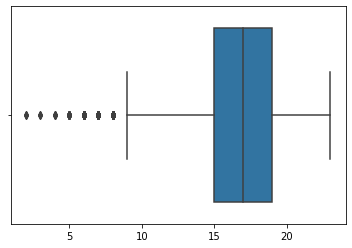

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(lengths)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 21

X_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_text, maxlen = max_len, padding = 'pre',
    truncating='post', value=0.0
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_text, maxlen = X_train.shape[1], dtype = 'int32', padding='pre',
    truncating='post', value=0.0
)


In [ ]:
lengths = [len(seq) for seq in train_label]
print('Longest sentence length = ',max(lengths))

Longest sentence length =  120


In [ ]:
max_len = 120

y_train = tf.keras.preprocessing.sequence.pad_sequences(
    train_label, maxlen = max_len, padding = 'post',
    truncating='pre', value=0.0
)

y_test = tf.keras.preprocessing.sequence.pad_sequences(
    test_label, maxlen = y_train.shape[1], dtype = 'int32', padding='post',
    truncating='pre', value=0.0
)


In [ ]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(40000, 21) (10000, 21)
(40000, 120) (10000, 120)


In [ ]:
y_train[0]

array([53,  4,  7,  6,  2, 12, 15,  5,  6,  9, 17,  2,  4,  5,  2, 15, 10,
       13,  5, 14,  5, 17, 54,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0], dtype=int32)

In [ ]:
decoder_train = []
decoder_test = []

for i in range(len(y_train)):
  decoder_train.append(y_train[i][1:].tolist())
  decoder_train[i].append(0)
decoder_train = np.array(decoder_train)

for i in range(len(y_test)):
  decoder_test.append(y_test[i][1:].tolist())
  decoder_test[i].append(0)
decoder_test = np.array(decoder_test)

In [ ]:
num = 101

print(decoder_test[num])
print()
print(y_test[num])

[19  3  4 28  2  6 15 12  2 13  9  7 54  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

[53 19  3  4 28  2  6 15 12  2 13  9  7 54  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
print(decoder_train.shape,decoder_test.shape)
print(y_train.shape,y_test.shape)

(40000, 120) (10000, 120)
(40000, 120) (10000, 120)


In [ ]:
!pip install scikit-plot

In [ ]:
#Importing the required libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,balanced_accuracy_score

In [ ]:
import numpy as np
np.unique(y_train)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int32)

In [ ]:
output_vec = 300
vocab_size = len(word_tokenizer.word_index) + 1
max_len = 21

In [ ]:
encoder_inputs_placeholder = tf.keras.layers.Input(shape=(max_len,))
x = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = output_vec)(encoder_inputs_placeholder)
encoder = tf.keras.layers.LSTM(256, return_sequences=True, return_state=True)

encoder_outputs, h, c = encoder(x)
encoder_states = [h, c]

In [ ]:
output_vec = 300
vocab_size = len(tag_tokenizer.word_index) + 3
num_classes = max(np.unique(y_train))
max_len = 120

In [ ]:
decoder_inputs_placeholder = tf.keras.layers.Input(shape=(max_len,))

decoder_embedding = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = output_vec)
decoder_inputs_x = decoder_embedding(decoder_inputs_placeholder)

decoder_lstm = tf.keras.layers.LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs_x, initial_state=encoder_states)

attention = tf.keras.layers.AdditiveAttention()
attn_out = attention([decoder_outputs, encoder_outputs])
decoder_outputs = tf.keras.layers.Concatenate(axis=-1)([decoder_outputs, attn_out])

decoder_dense = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_classes + 1, activation = tf.nn.softmax))
decoder_final_outputs = decoder_dense(decoder_outputs)

In [ ]:
model = tf.keras.Model(inputs = [encoder_inputs_placeholder,decoder_inputs_placeholder], outputs = decoder_final_outputs)

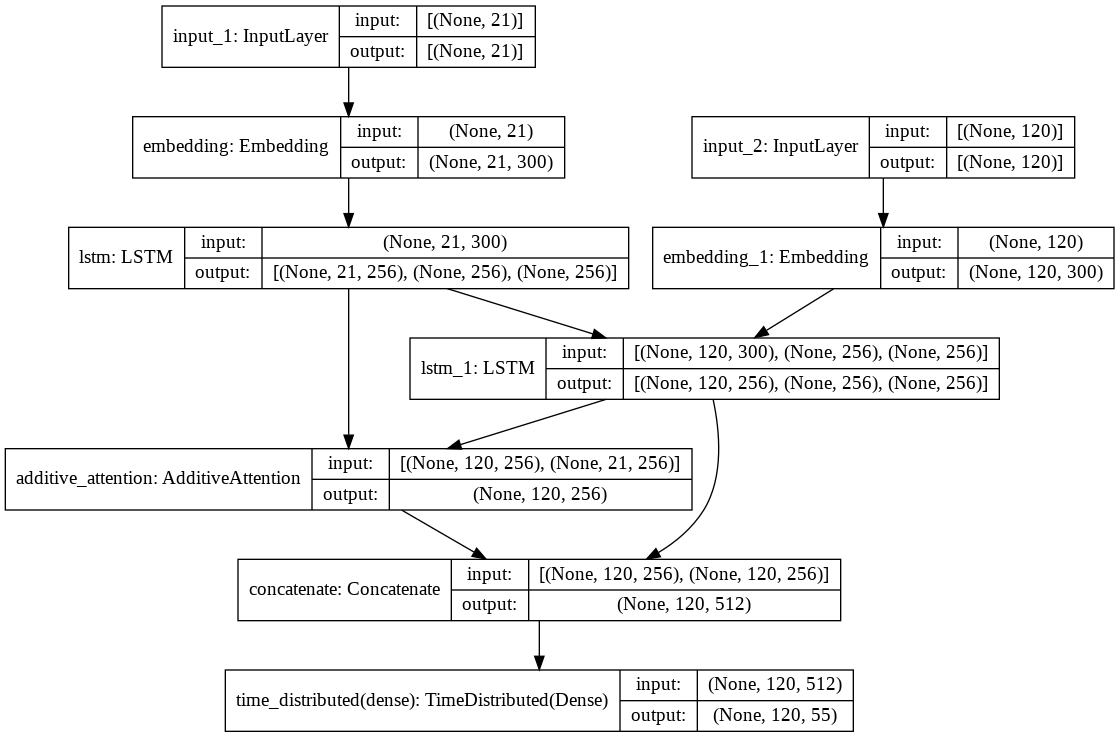

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 21)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 120)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 21, 300)      12300       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 120, 300)     16500       input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import time

def balanced_accuracy(y_true, y_pred):
  y_true = y_true.numpy()
  y_pred = y_pred.numpy()
  y_pred = np.argmax(y_pred,axis=-1)

  y_true = y_true.ravel()
  y_pred = y_pred.ravel()

  #Here we will remove the padded zeroes since they will increase the balanced accuracy
  #You can also remove tokens corresponding to punctuation like ',' or '!' since there output is not useful
  y_true = np.trim_zeros(y_true, 'b')  
  y_true = np.append(y_true,0)
  y_pred = y_pred[:(y_true.shape[0])]

  num_classes = len(np.unique(y_true))

  cm = confusion_matrix(y_true, y_pred).T
  balanced_accuracy = 0
  for i in range(num_classes):
    num = cm[i,i]
    den = np.sum(cm[:,i])
    if num == 0 :
      acc = 0
    else:
      acc = num / den
    balanced_accuracy += acc

  return (balanced_accuracy / num_classes)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), 
              loss = tf.keras.losses.sparse_categorical_crossentropy, #binary_crossentropy
              metrics = balanced_accuracy, run_eagerly=True ) #tf.keras.metrics.CategoricalAccuracy()

In [ ]:
batch_size = 32
steps_per_epoch = len(X_train) // batch_size
validation_batch_size = 32
validation_steps = len(X_test) // validation_batch_size

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_balanced_accuracy', min_delta=0, patience=3,
    mode='max', baseline=None, restore_best_weights=True
)

In [ ]:
start_time = time.time()

result = model.fit([X_train, y_train],
                   decoder_train,
                   validation_data = ([X_test, y_test], decoder_test), 
                   callbacks=[callback],
                   epochs = 25,
                   batch_size = batch_size,
                   steps_per_epoch = steps_per_epoch, 
                   validation_batch_size = validation_batch_size,
                   validation_steps = validation_steps
                   )

model_time = (time.time() - start_time)
print('\nTraining time(sec) = ',model_time)

Epoch 1/25
1250/1250 [==============================] - 348s 279ms/step - loss: 0.3450 - balanced_accuracy: 0.2913 - val_loss: 0.2548 - val_balanced_accuracy: 0.4097
Epoch 2/25
1250/1250 [==============================] - 321s 256ms/step - loss: 0.2223 - balanced_accuracy: 0.4675 - val_loss: 0.1963 - val_balanced_accuracy: 0.5209
Epoch 3/25
1250/1250 [==============================] - 350s 280ms/step - loss: 0.1801 - balanced_accuracy: 0.5491 - val_loss: 0.1688 - val_balanced_accuracy: 0.5799
Epoch 4/25
1250/1250 [==============================] - 348s 279ms/step - loss: 0.1561 - balanced_accuracy: 0.6032 - val_loss: 0.1521 - val_balanced_accuracy: 0.6176
Epoch 5/25
1250/1250 [==============================] - 325s 260ms/step - loss: 0.1396 - balanced_accuracy: 0.6416 - val_loss: 0.1417 - val_balanced_accuracy: 0.6398
Epoch 6/25
1250/1250 [==============================] - 352s 281ms/step - loss: 0.1271 - balanced_accuracy: 0.6715 - val_loss: 0.1338 - val_balanced_accuracy: 0.6625
Epoc

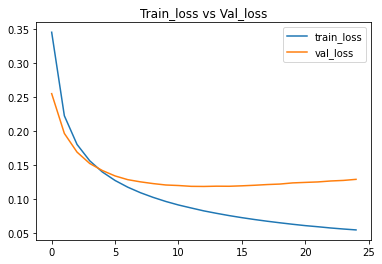

In [ ]:
plt.plot(result.history['loss'] , label = 'train_loss')
plt.plot(result.history['val_loss'] , label = 'val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()
plt.show()

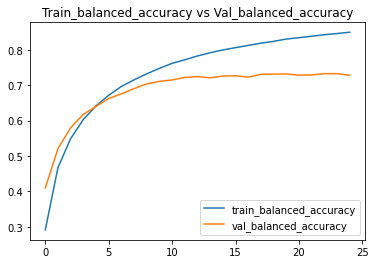

In [ ]:
plt.plot(result.history['balanced_accuracy'] , label = 'train_balanced_accuracy')
plt.plot(result.history['val_balanced_accuracy'] , label = 'val_balanced_accuracy')
plt.title('Train_balanced_accuracy vs Val_balanced_accuracy')
plt.legend()
plt.show()

Prediction time(sec) =  10.368372917175293
313/313 [==============================] - 10s 31ms/step - loss: 0.0000e+00 - balanced_accuracy: 0.0000e+00


Training score =  0.8599436810447737
Tesing score =  0.5737232383136807


No of missclassified for class 0 (test data) = 0 
No of missclassified for class 1 (test data) = 1 
No of missclassified for class 2 (test data) = 2409 
No of missclassified for class 3 (test data) = 4316 
No of missclassified for class 4 (test data) = 2935 
No of missclassified for class 5 (test data) = 2146 
No of missclassified for class 6 (test data) = 1938 
No of missclassified for class 7 (test data) = 3076 
No of missclassified for class 8 (test data) = 1360 
No of missclassified for class 9 (test data) = 2375 
No of missclassified for class 10 (test data) = 1863 
No of missclassified for class 11 (test data) = 994 
No of missclassified for class 12 (test data) = 1311 
No of missclassified for class 13 (test data) = 1564 
No of missclassified for class 14 

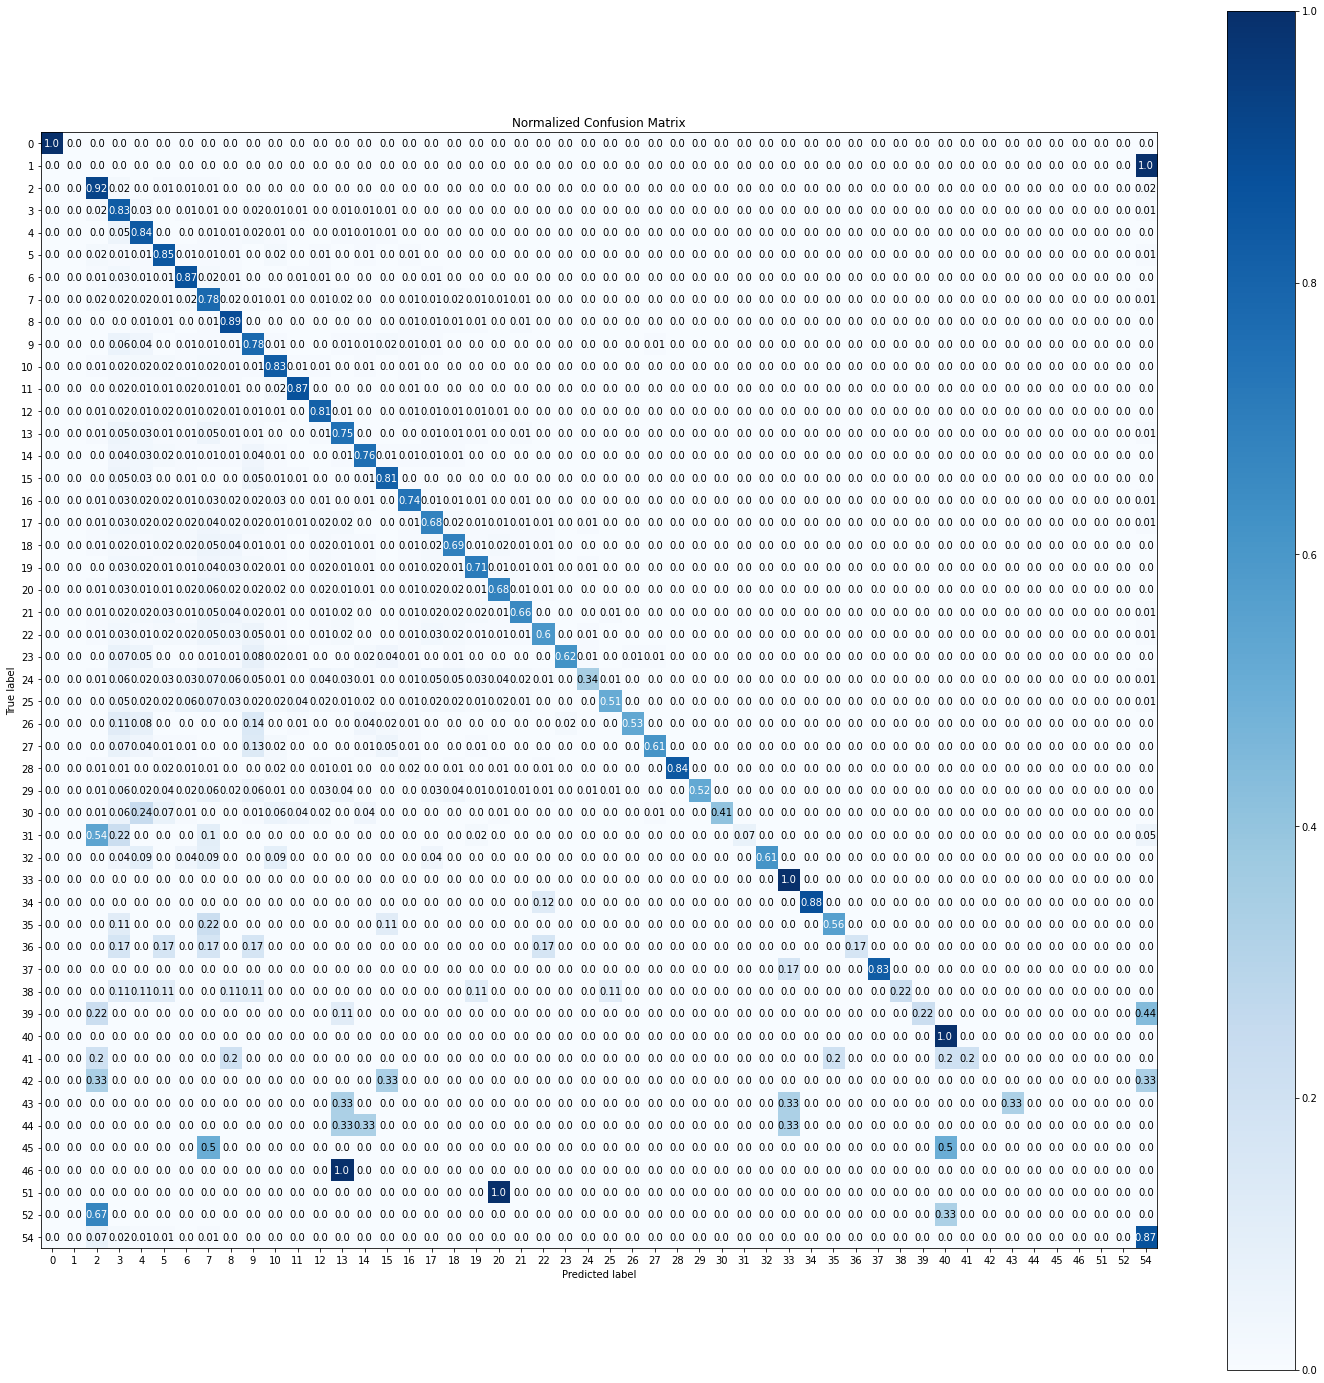



Classification report:-

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    977157
           1       0.00      0.00      0.00         1
           2       0.92      0.92      0.92     30466
           3       0.80      0.83      0.81     25765
           4       0.83      0.84      0.83     18160
           5       0.85      0.85      0.85     14758
           6       0.87      0.87      0.87     14584
           7       0.76      0.78      0.77     14007
           8       0.86      0.89      0.88     12734
           9       0.74      0.78      0.76     10676
          10       0.84      0.83      0.83     10647
          11       0.91      0.87      0.89      7944
          12       0.82      0.81      0.81      7017
          13       0.76      0.75      0.76      6188
          14       0.79      0.76      0.77      5693
          15       0.84      0.81      0.83      4962
          16       0.74      0.74      0.74      5029


In [ ]:
def print_results(y_train,y_test,decoder_train,decoder_test):
  y_pred1 = model.predict([X_train, y_train])
  y_pred1 = np.argmax(y_pred1, axis=2)

  start_time = time.time()
  y_pred = model.predict([X_test, y_test])
  y_pred = np.argmax(y_pred, axis=2)
  model_time2 = (time.time() - start_time)
  print('Prediction time(sec) = ',model_time2)

  decoder_train = decoder_train.ravel()
  decoder_test = decoder_test.ravel()
  y_pred1 = y_pred1.ravel()
  y_pred = y_pred.ravel()

  cm_model = confusion_matrix(decoder_test, y_pred)
  model_miss = np.sum(y_pred!=decoder_test.ravel())
  acc1_model = balanced_accuracy_score(decoder_train,y_pred1)
  acc2_model = balanced_accuracy_score(decoder_test,y_pred)

  loss1_model = model.evaluate([X_train, y_train])[0]
  loss2_model = model.evaluate([X_test, y_test])[0]

  print('\n\nTraining score = ',acc1_model)
  print('Tesing score = ',acc2_model)
  print('\n')

  label = list(tag_tokenizer.word_index.values())
  label.insert(0,0)
  for i in range(len(np.unique(decoder_test))):
      err = np.sum(cm_model[i])-cm_model[i][i]
      print('No of missclassified for class {} (test data) = {} '.format(label[i],err))
  print('Total no of missclassified points(test data) = ',model_miss)
  print('Total % of missclassified points(test data) = ',model_miss/len(decoder_test))
  print('\n\nTraining log_loss = ',loss1_model)
  print('Tesing log_loss = ',loss2_model)

  print('\n')
  tags = tag_tokenizer.word_index
  tags['padding'] = 0
  print(dict(sorted(tags.items(), key=lambda x:x[1])))
  print('\n\nConfusion matrix:')
  skplt.metrics.plot_confusion_matrix(decoder_test, y_pred , figsize = (25,25),normalize=True)
  plt.show()
  print('\n\nClassification report:-\n')
  print(classification_report(decoder_test,y_pred))
  print('**************************************************************************')

  # RNN = [acc1_model,acc2_model,model_miss,model_miss/len(decoder_test),loss1_model,loss2_model,model_time,model_time2]

print_results(y_train,y_test,decoder_train,decoder_test)

In [ ]:
print(y_train.shape)
print(y_test.shape)
print()
print(decoder_train.shape)
print(decoder_test.shape)

(40000, 120)
(10000, 120)

(40000, 120)
(10000, 120)


In [ ]:
encoder_results = [encoder_outputs, h, c]
encoder_model = tf.keras.Model(inputs = encoder_inputs_placeholder, outputs = encoder_results)

In [ ]:
decoder_inputs_single = tf.keras.layers.Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding(decoder_inputs_single)

decoder_state_input_h = tf.keras.layers.Input(shape=(256,))
decoder_state_input_c = tf.keras.layers.Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state = decoder_states_inputs)

encoder_state_outputs = tf.keras.layers.Input(shape=(21,256,))
attn_out = attention([decoder_outputs, encoder_state_outputs])
decoder_outputs = tf.keras.layers.Concatenate(axis=-1)([decoder_outputs, attn_out])

decoder_states = [h, c]
decoder_final_outputs = decoder_dense(decoder_outputs)

In [ ]:
decoder_model = tf.keras.Model(inputs = [decoder_inputs_single] + decoder_states_inputs + [encoder_state_outputs], outputs = [decoder_final_outputs] + decoder_states)

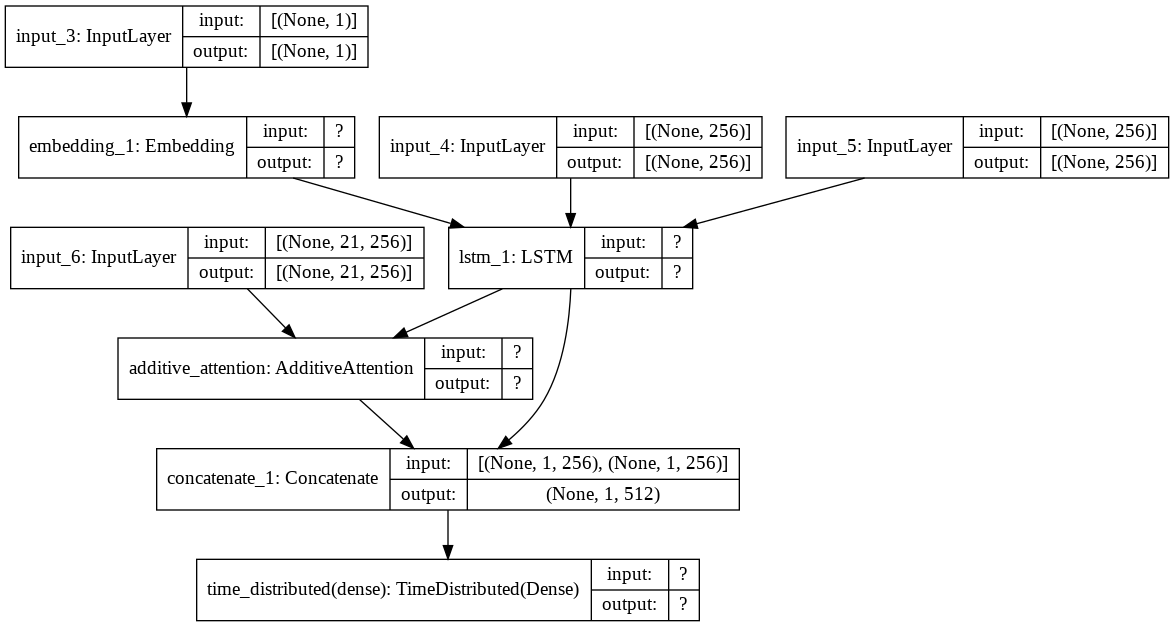

In [ ]:
plot_model(decoder_model, to_file='model_plot_dec.png', show_shapes=True, show_layer_names=True)

In [ ]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         multiple             16500       input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 256)]        0                                            
____________________________________________________________________________________________

In [ ]:
import string
import contractions

def text_preprocess(s):
  s = contractions.fix(s)
  s = s.lower()
  s = s.rstrip()
  s = s.lstrip()

  text = ""
  for ch in s:
    if ch not in string.punctuation:
      text = text + ch
  return text

In [ ]:
def translate_sentence(text, max_len, start_token, end_token, max_output_len, tags, word_tokenizer):
  original_text = text
  text = text_preprocess(text)

  data = np.array(word_tokenizer.texts_to_sequences(text))
  data = data.ravel()

  data = tf.keras.preprocessing.sequence.pad_sequences(
      [data], maxlen = max_len, padding = 'pre',
      truncating='post', value=0.0 )
  
  target_seq = np.zeros((1, 1))
  target_seq[0, 0] = start_token
  target_seq = target_seq.ravel()

  encoder_outputs, h, c = encoder_model.predict(data)
  states_value = [h,c]
  output_tokens, h, c = decoder_model.predict([target_seq] + states_value + [encoder_outputs])

  output_sen = []
  for _ in range(max_output_len):
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value + [encoder_outputs])
    idx = np.argmax(output_tokens,axis=2).ravel()

    if idx == end_token:
      break
    else:
      output_sen.append(tags[idx[0]])

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = idx[0]
    target_seq = target_seq.ravel()
    states_value = [h, c]

  return original_text,''.join(output_sen)

In [ ]:
text = 'I am very Happy'
max_len = 21
start_token = 53
end_token = 54
max_output_len = 120

tags_dict = tag_tokenizer.word_index
tags_dict = dict([(value, key) for key, value in tags_dict.items()])

In [ ]:
text, output = translate_sentence(text, max_len, start_token, end_token, max_output_len, tags_dict, word_tokenizer) 

In [ ]:
text

'I am very Happy'

In [ ]:
output

'ich bin sehr glücklich'

In [ ]:
import pandas as pd

def testing_model(X_test, y_test):
  words = word_tokenizer.word_index
  words = dict([(value, key) for key, value in words.items()])

  tags = tag_tokenizer.word_index
  tags = dict([(value, key) for key, value in tags.items()])

  train_text = []
  for i in range(len(X_test)):
    train_text.append(np.trim_zeros(X_test[i], 'f').tolist())
  X_test = np.array(train_text)

  eng_text = []
  for i in range(len(X_test)):
    temp = []
    for j in range(len(X_test[i])):
      temp.append(words[X_test[i][j]])
    eng_text.append(''.join(temp))

  test_text = []
  for i in range(len(y_test)):
    test_text.append(np.trim_zeros(y_test[i], 'b').tolist())
    test_text[i].pop(0)
    test_text[i].pop()
  y_test = np.array(test_text)

  actual_text = []
  for i in range(len(y_test)):
    temp = []
    for j in range(len(y_test[i])):
      temp.append(tags[y_test[i][j]])
    actual_text.append(''.join(temp))

  pred_text = []
  for i in range(len(eng_text)):
    text, output = translate_sentence(eng_text[i], max_len, start_token, end_token, max_output_len, tags_dict, word_tokenizer) 
    pred_text.append(output)

  df = pd.DataFrame()
  df['English_text'] = eng_text
  df['actual_output'] = actual_text
  df['predicted_output'] = pred_text

  return df

In [ ]:
df = testing_model(X_test[1:11], y_test[1:11])

In [ ]:
df

,English_text,actual_output,predicted_output
0,i have seen things,ich habe dinge gesehen,ich habe seinen gesehen
1,some bugs were fixed,einige fehler wurden behoben,es schaut französisch seine arbeit
2,i had three dogs,ich hatte drei hunde,ich hatte drei tun
3,i have a theory,ich habe eine theorie,ich habe eine theorie
4,maybe tom likes you,vielleicht mag tom dich leiden,manite mag tom
5,we will be busy,wir werden beschäftigt sein,wir werden beschäftigt bin
6,may god reward you,möge gott dir’s vergelten,geht gloß hier darauf gegen sich hin
7,do you have a knife,hast du ein messer,habt ihr ein kind
8,i will come home,ich werde nach hause kommen,ich werde kommen
9,we are baking cookies,wir backen kekse,wir backen bald kochen


In [ ]:
save_path = '/content/drive/MyDrive/Dl projects/RNN basics/Machine Translation'

model_name1 = 'rnn_encoder_model'
model_path1 = save_path + '/' + model_name1
encoder_model.save(model_path1)

model_name2 = 'rnn_decoder_model'
model_path2 = save_path + '/' + model_name2
decoder_model.save(model_path2) 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/Machine Translation/rnn_encoder_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/Machine Translation/rnn_encoder_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/Machine Translation/rnn_decoder_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Dl projects/RNN basics/Machine Translation/rnn_decoder_model/assets


In [ ]:
import os
os.chdir(save_path)
print(os.getcwd())

import joblib
joblib.dump(tags_dict , 'tags.joblib')
joblib.dump(word_tokenizer , 'tokenizer.joblib')

/content/drive/MyDrive/Dl projects/RNN basics/Machine Translation


['tokenizer.joblib']